In [1]:
import sys
sys.path.append('/home/yja6qa/arepo_package/')

import arepo_package
import scipy.interpolate
import h5py
import os
import numpy as np
import plotting
from brahma_analysis import *
from sklearn.linear_model import LinearRegression

%matplotlib inline

h = 0.6774
radiative_efficiency=0.2

In [2]:
modelTNG = LinearRegression()
model=LinearRegression()

Illustris_TNG = np.array([2.587301587301587, 9.627450980392155,2.4761904761904763, 9.352941176470587,2.373015873015873, 
                 9.117647058823529,2.2777777777777777, 8.88235294117647,2.142857142857143, 8.549019607843135,
                 2.0396825396825395, 8.313725490196077,1.996031746031746, 8.196078431372548])

Illustris = np.array([2.5555555555555554, 10.017740429505135,2.4126984126984126, 9.482726423902893,
                      2.317460317460317, 9.126050420168067,2.238095238095238, 8.828820417055711,2.142857142857143, 
                      8.491752256458138,2.0436507936507935, 8.11531279178338,2, 7.9567382508558975])

xs=list(np.arange(0,14,2))
ys=list(np.arange(1,15,2))

modelxTNG=Illustris_TNG[xs].reshape(-1, 1)
modelyTNG=Illustris_TNG[ys].reshape(-1, 1)

modelx=Illustris[xs].reshape(-1, 1)
modely=Illustris[ys].reshape(-1, 1)

modelTNG.fit(modelxTNG,modelyTNG)
model.fit(modelx,modely)

x=np.linspace(0.75,2.5,100)
TNGy=modelTNG.coef_*x + modelTNG.intercept_
y=model.coef_*x + model.intercept_

In [3]:
Korm_Ho_2013=np.array([1.7222222222222223, 5.980392156862745,1.8611111111111112, 6.568627450980392,1.9801587301587302, 7.098039215686274,2.0912698412698414, 7.568627450980392,2.1666666666666665, 7.901960784313726,2.253968253968254, 8.294117647058824,2.365079365079365, 8.784313725490197,2.492063492063492, 9.333333333333334,2.575396825396825, 9.686274509803923])

model=LinearRegression()

KH13_x = list(np.arange(0,len(Korm_Ho_2013)-2,2))
KH13_y=list(np.arange(1,len(Korm_Ho_2013)-1,2))

modelx=Korm_Ho_2013[KH13_x].reshape(-1, 1)
modely=Korm_Ho_2013[KH13_y].reshape(-1, 1)

model.fit(modelx,modely)

xfit=np.linspace(0.75,2.5,100)
KH13_yfit=model.coef_*xfit + model.intercept_

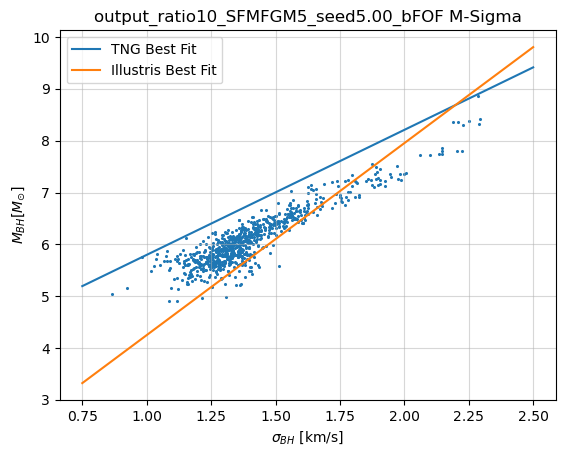

In [5]:
New_bFOF_z0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z0')

plt.scatter(np.log10(New_bFOF_z0[5])[:,0],np.log10(New_bFOF_z0[0]),s=1.5)
plt.plot(x,TNGy[0],label='TNG Best Fit')
plt.plot(x,y[0],label='Illustris Best Fit')
plt.xlabel('$\sigma_{BH}$ [km/s]')
plt.ylabel('$M_{BH} [M_{\odot}]$')
#plt.xlim(1.5,2.75)
#plt.ylim(5.5,10.5)
plt.grid(alpha=0.5)
plt.legend()
plt.title('output_ratio10_SFMFGM5_seed5.00_bFOF M-Sigma')
plt.savefig('output_ratio10_SFMFGM5_seed5.00_bFOF_z0_10stars.png')

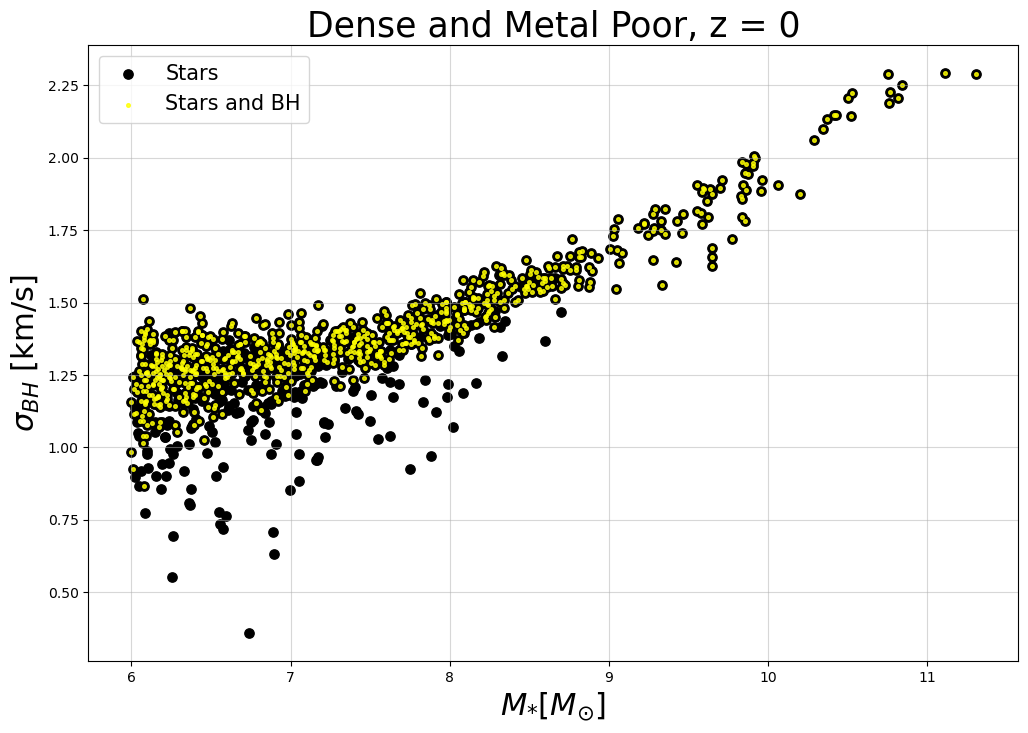

In [6]:
MstarsBH = [np.sum(New_bFOF_z0[1][i]) for i in range(len(New_bFOF_z0[1]))]
Mstars = [np.sum(New_bFOF_z0[2][i]) for i in range(len(New_bFOF_z0[2]))]

plt.figure(figsize=(12,8))
plt.scatter(np.log10(Mstars),np.log10(New_bFOF_z0[6])[:,0],s=45,color='black',label='Stars')
plt.scatter(np.log10(MstarsBH),np.log10(New_bFOF_z0[5])[:,0],s=7,color='yellow',marker='o',label = 'Stars and BH',alpha=0.8)
plt.legend(fontsize=15)
plt.grid(alpha=0.5)

plt.title('Dense and Metal Poor, z = 0',size=25)
plt.xlabel('$M_{*} [M_{\odot}]$',size=22)
plt.ylabel('$\sigma_{BH}$ [km/s]',size=22)

plt.savefig('output_ratio10_SFMFGM5_seed5.00_bFOF_z0_Mstar_sigma.png')

# Comparing with Illustris TNG

In [4]:
bFOF=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z0')
TNGz0=ReadBrahmaData('Brahma_Data/TNG_z0')

# Grabbing x-sigma values
sigmaxTNG=np.array([sigma[0] for sigma in TNGz0[4]])
sigmax1=np.array([sigma[0] for sigma in bFOF[5]])

M_TNGz0 = np.array(TNGz0[0])
M_bFOF = np.array(bFOF[0])

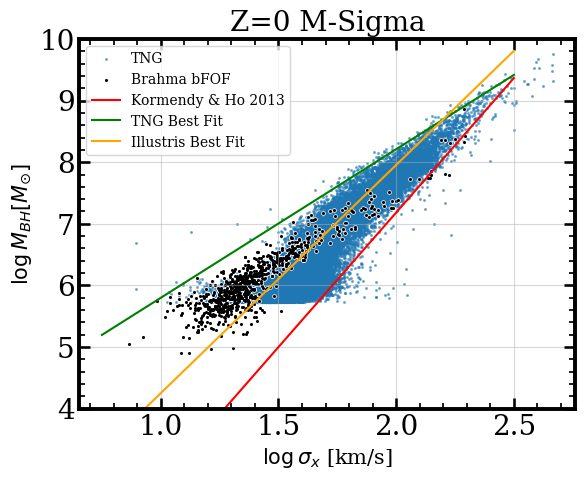

In [6]:
plt.scatter(np.log10(sigmaxTNG),np.log10(M_TNGz0),s=1.5,label="TNG",alpha=0.5)
plt.scatter(np.log10(sigmax1),np.log10(M_bFOF),s=5,color='white',alpha=1)
plt.scatter(np.log10(sigmax1),np.log10(M_bFOF),s=1.5,label="Brahma bFOF",color='black',alpha=1)
plt.plot(xfit,KH13_yfit[0],label='Kormendy & Ho 2013',color='red')
plt.plot(x,TNGy[0],label='TNG Best Fit',color='green')
plt.plot(x,y[0],label='Illustris Best Fit',color='orange')

plt.xlabel('$\log \sigma_{x}$ [km/s]',size=15)
plt.ylabel('$\log M_{BH} [M_{\odot}]$',size=15)

plt.ylim(4,10)
plt.grid(alpha=0.5)
plt.legend(fontsize=10)
    
plt.title('Z=0 M-Sigma',size=20)

plt.savefig('Z0_TNG_bFOF_comparison.png')

In [ ]:
TNGz0=ReadBrahmaData('Brahma_Data/TNG_z0')

# Grabbing x-sigma values
sigmax1=np.array([sigma[0] for sigma in TNGz0[3]])

# Getting rid of nonzero values
nonzero1 = np.nonzero(sigmax1)[0]

sigmax1=sigmax1[nonzero1]

Mstars_total = [np.sum(i) for i in TNGz0[1]]

MStar_TNGz0 = np.array(Mstars_total)[nonzero1]

# Plotting
plt.scatter(np.log10(sigmax1),np.log10(MStar_TNGz0),s=1.5,label="TNG",alpha=0.5)

# plt.plot(x,TNGy[0],label='TNG Best Fit')
# plt.plot(x,y[0],label='Illustris Best Fit')
plt.xlabel('$\sigma_{BH,x}$ [km/s]',size=15)
plt.ylabel('$M_{*} [M_{\odot}]$',size=15)
# plt.ylim()
plt.grid(alpha=0.5)
plt.legend(fontsize=10)
    
plt.title('Z=0 Mstar-Sigma',size=20)

plt.savefig('Z0_TNG_Mstar_Sigma.png')

# Comparing different Brahma boxes!

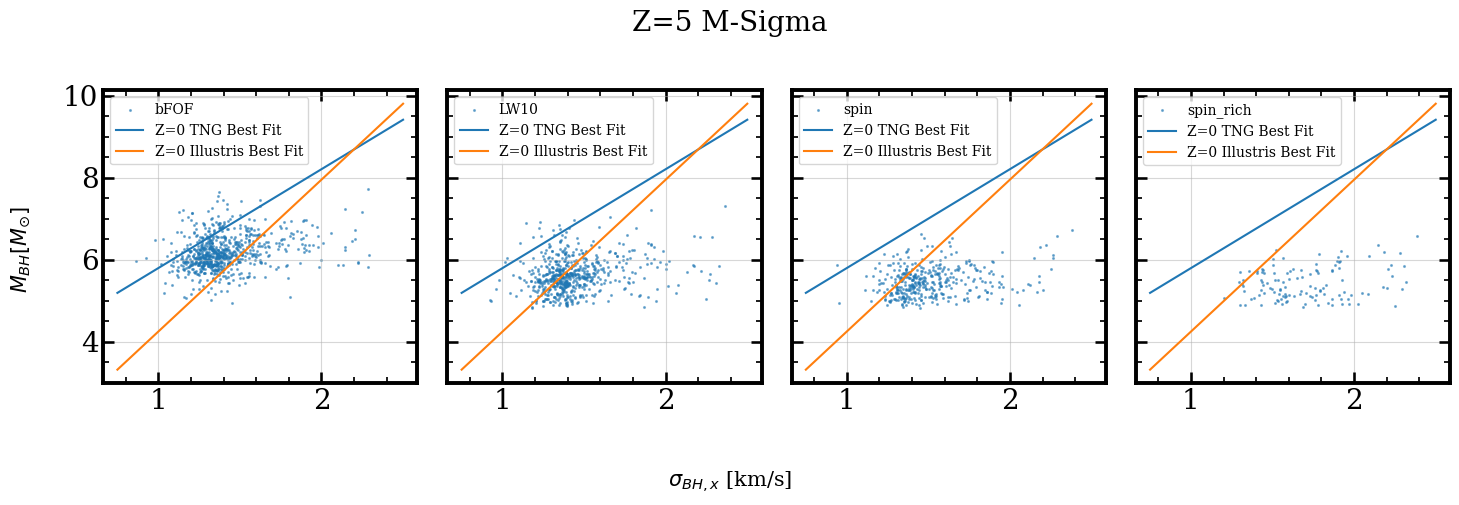

In [36]:
bFOFz5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z5')
LW10=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z5')
spin = ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z5')
spin_rich=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z5')

# Grabbing x-sigma values
Sigma_bFOF = np.log10(bFOFz5[5])[:,0]
Sigma_LW10 = np.log10(LW10[5])[:,0]
Sigma_spin = np.log10(spin[5])[:,0]
Sigma_rich = np.log10(rich[5])[:,0]

M_bFOF = np.array(bFOFz5[0])[nonzero1]
M_LW10 = np.array(LW10[0])[nonzero2]
M_spin = np.array(spin[0])[nonzero3]
M_spin_rich = np.array(spin_rich[0])[nonzero4]

# Plotting
f,axs = plt.subplots(1,4,sharey = True,sharex=True,figsize = (15,5))

axs[0].scatter(np.log10(sigmax1),np.log10(M_bFOF),s=1.5,label="bFOF",alpha=0.5)
axs[1].scatter(np.log10(sigmax2),np.log10(M_LW10),s=1.5,label="LW10",alpha=0.5)
axs[2].scatter(np.log10(sigmax3),np.log10(M_spin),s=1.5,label="spin",alpha=0.5)
axs[3].scatter(np.log10(sigmax4),np.log10(M_spin_rich),s=1.5,label="spin_rich",alpha=0.5)

# plt.plot(x,TNGy[0],label='TNG Best Fit')
# plt.plot(x,y[0],label='Illustris Best Fit')
f.supxlabel('$\sigma_{BH,x}$ [km/s]',size=15)
f.supylabel('$M_{BH} [M_{\odot}]$',size=15)

for ax in axs:
    ax.grid(alpha=0.5)
    ax.plot(x,TNGy[0],label='Z=0 TNG Best Fit')
    ax.plot(x,y[0],label='Z=0 Illustris Best Fit')
    ax.legend(fontsize=10)
    
f.suptitle('Z=5 M-Sigma',size=20)
f.tight_layout()

plt.savefig('Z5_Comparison.png')

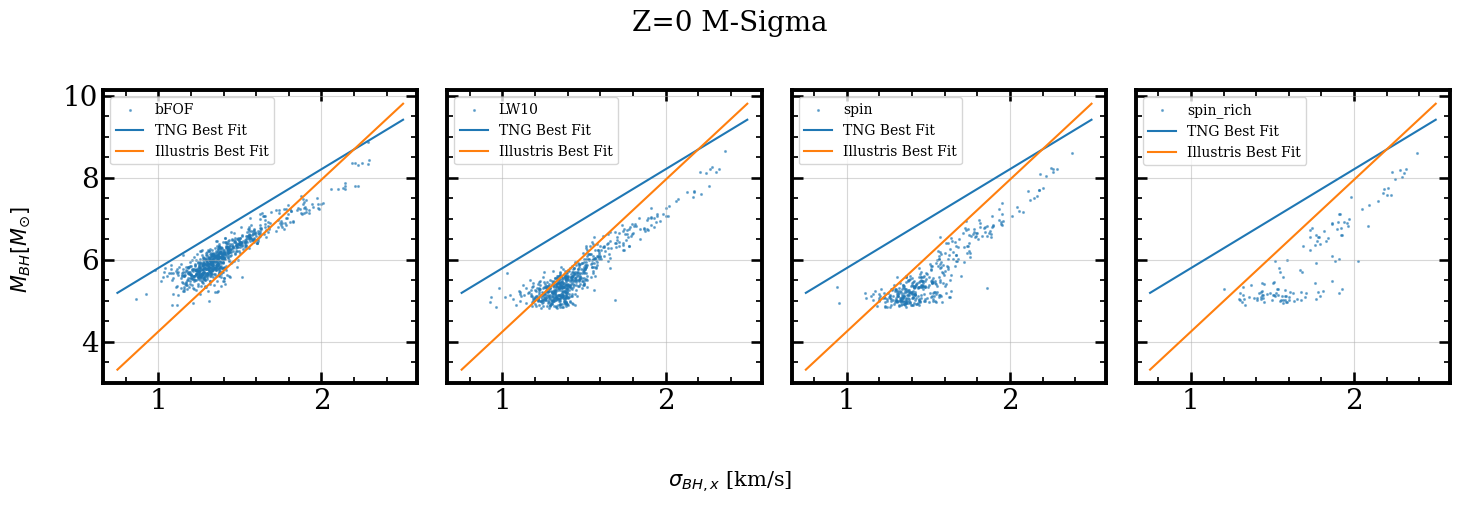

In [37]:
bFOF=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z0')
LW10=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z0')
spin = ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z0')
spin_rich=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z0')

# Grabbing x-sigma values
Sigma_bFOF = np.log10(bFOF[5])[:,0]
Sigma_LW10 = np.log10(LW10[5])[:,0]
Sigma_spin = np.log10(spin[5])[:,0]
Sigma_rich = np.log10(rich[5])[:,0]

M_bFOF = np.array(bFOF[0])[nonzero1]
M_LW10 = np.array(LW10[0])[nonzero2]
M_spin = np.array(spin[0])[nonzero3]
M_spin_rich = np.array(spin_rich[0])[nonzero4]

# Plotting
f,axs = plt.subplots(1,4,sharey = True,sharex=True,figsize = (15,5))

axs[0].scatter(np.log10(sigmax1),np.log10(M_bFOF),s=1.5,label="bFOF",alpha=0.5)
axs[1].scatter(np.log10(sigmax2),np.log10(M_LW10),s=1.5,label="LW10",alpha=0.5)
axs[2].scatter(np.log10(sigmax3),np.log10(M_spin),s=1.5,label="spin",alpha=0.5)
axs[3].scatter(np.log10(sigmax4),np.log10(M_spin_rich),s=1.5,label="spin_rich",alpha=0.5)

# plt.plot(x,TNGy[0],label='TNG Best Fit')
# plt.plot(x,y[0],label='Illustris Best Fit')
f.supxlabel('$\sigma_{BH,x}$ [km/s]',size=15)
f.supylabel('$M_{BH} [M_{\odot}]$',size=15)

for ax in axs:
    ax.grid(alpha=0.5)
    ax.plot(x,TNGy[0],label='TNG Best Fit')
    ax.plot(x,y[0],label='Illustris Best Fit')
    ax.legend(fontsize=10)
    
f.suptitle('Z=0 M-Sigma',size=20)
f.tight_layout()

plt.savefig('Z0_Comparison.png')

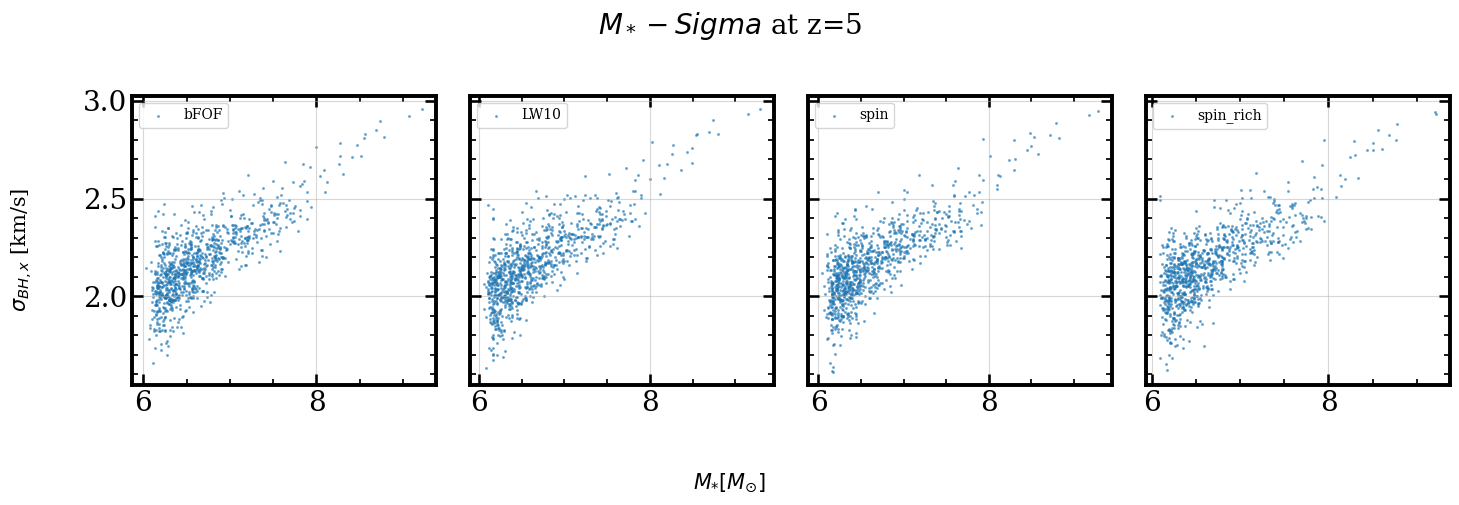

In [39]:
bFOFz5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z5')
LW10z5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z5')
spinz5 = ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z5')
richz5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z5')

# Grabbing x-sigma values
sigmax1 = np.log10(bFOFz5[6])[:,0]
sigmax2 = np.log10(LW10z5[6])[:,0]
sigmax3 = np.log10(spinz5[6])[:,0]
sigmax4 = np.log10(richz5[6])[:,0]

Mstar_bFOF = np.array([np.sum(bFOFz5[2][i]) for i in range(len(bFOFz5[2]))])
Mstar_LW10 = np.array([np.sum(LW10z5[2][i]) for i in range(len(LW10z5[2]))])
Mstar_spin = np.array([np.sum(spinz5[2][i]) for i in range(len(spinz5[2]))])
Mstar_rich = np.array([np.sum(richz5[2][i]) for i in range(len(richz5[2]))])

# Plotting
f,axs = plt.subplots(1,4,sharey = True,figsize = (15,5))

axs[0].scatter(np.log10(Mstar_bFOF),sigmax1,s=1.5,label="bFOF",alpha=0.5)
axs[1].scatter(np.log10(Mstar_LW10),sigmax2,s=1.5,label="LW10",alpha=0.5)
axs[2].scatter(np.log10(Mstar_spin),sigmax3,s=1.5,label="spin",alpha=0.5)
axs[3].scatter(np.log10(Mstar_rich),sigmax4,s=1.5,label="spin_rich",alpha=0.5)

# plt.plot(x,TNGy[0],label='TNG Best Fit')
# plt.plot(x,y[0],label='Illustris Best Fit')
f.supylabel('$\sigma_{BH,x}$ [km/s]',size=15)
f.supxlabel('$M_{*} [M_{\odot}]$',size=15)

for ax in axs:
    ax.grid(alpha=0.5)
    ax.legend(fontsize=10)
    
f.suptitle('$M_*-Sigma$ at z=5',size=20)
f.tight_layout()

plt.savefig('Plots/Z5_Mstar_Sigma_Comparison.png')

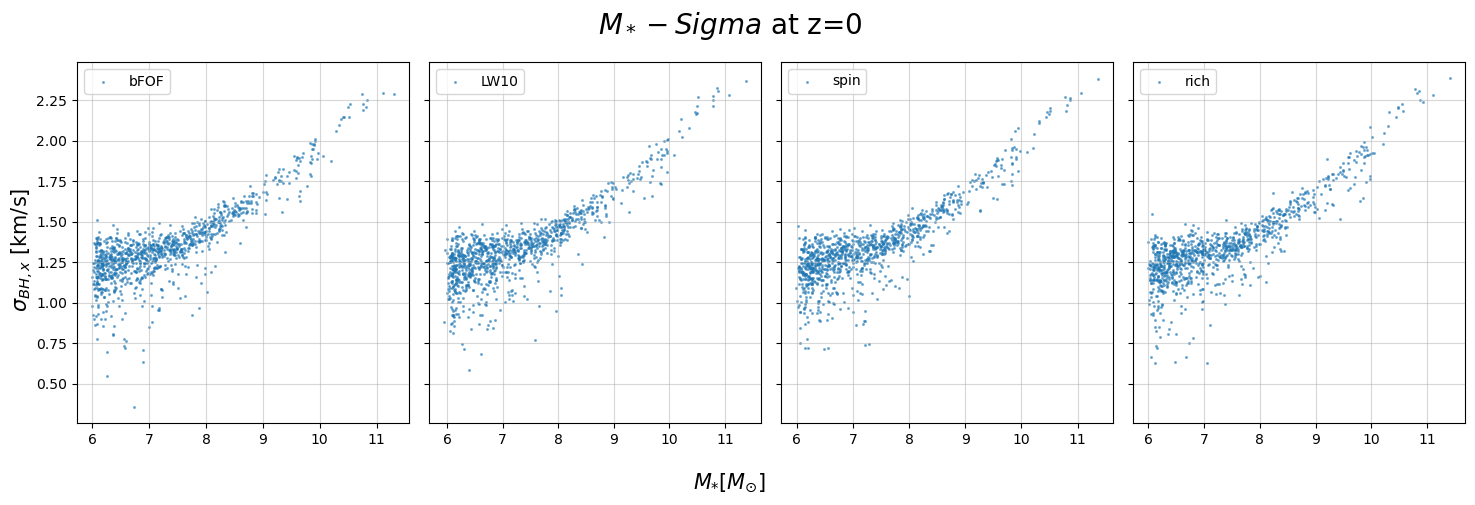

In [12]:
bFOFz0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z0')
LW10z0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z0')
spinz0 = ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z0')
richz0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z0')

MstarsbFOF = [np.sum(bFOFz0[2][i]) for i in range(len(bFOFz0[2]))]
MstarsLW10 = [np.sum(LW10z0[2][i]) for i in range(len(LW10z0[2]))]
Mstarsspin = [np.sum(spinz0[2][i]) for i in range(len(spinz0[2]))]
Mstarsrich = [np.sum(richz0[2][i]) for i in range(len(richz0[2]))]

# Plotting
f,axs = plt.subplots(1,4,sharey = True,figsize = (15,5))

axs[0].scatter(np.log10(MstarsbFOF),np.log10(bFOFz0[6])[:,0],s=1.5,label="bFOF",alpha=0.5)
axs[1].scatter(np.log10(MstarsLW10),np.log10(LW10z0[6])[:,0],s=1.5,label="LW10",alpha=0.5)
axs[2].scatter(np.log10(Mstarsspin),np.log10(spinz0[6])[:,0],s=1.5,label="spin",alpha=0.5)
axs[3].scatter(np.log10(Mstarsrich),np.log10(richz0[6])[:,0],s=1.5,label="rich",alpha=0.5)

# plt.plot(x,TNGy[0],label='TNG Best Fit')
# plt.plot(x,y[0],label='Illustris Best Fit')
f.supxlabel('$M_{*} [M_{\odot}]$',size=15)
f.supylabel('$\sigma_{BH,x}$ [km/s]',size=15)

for ax in axs:
    ax.grid(alpha=0.5)
    ax.legend(fontsize=10)
    
f.suptitle('$M_*-Sigma$ at z=0',size=20)
f.tight_layout()

plt.savefig('Z0_Mstar_Sigma_Comparison.png')

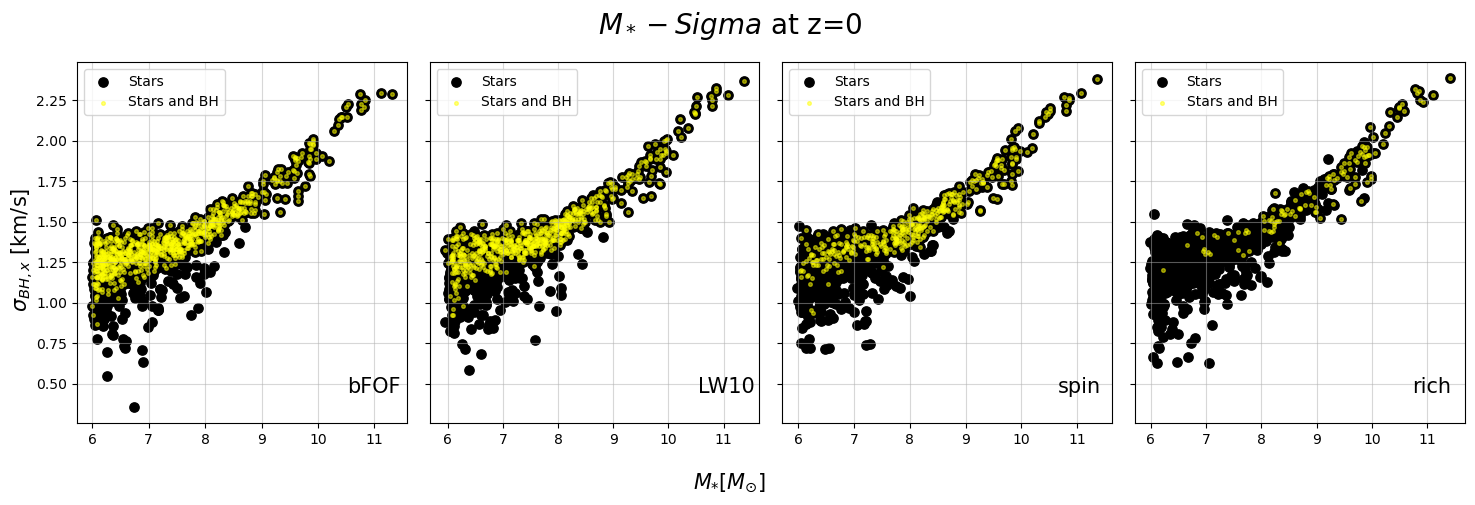

In [15]:
bFOFz0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z0')
LW10z0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z0')
spinz0 = ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z0')
richz0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z0')

MstarsbFOF = [np.sum(bFOFz0[2][i]) for i in range(len(bFOFz0[2]))]
MstarsLW10 = [np.sum(LW10z0[2][i]) for i in range(len(LW10z0[2]))]
Mstarsspin = [np.sum(spinz0[2][i]) for i in range(len(spinz0[2]))]
Mstarsrich = [np.sum(richz0[2][i]) for i in range(len(richz0[2]))]

MstarsbFOFBH = [np.sum(bFOFz0[1][i]) for i in range(len(bFOFz0[1]))]
MstarsLW10BH = [np.sum(LW10z0[1][i]) for i in range(len(LW10z0[1]))]
MstarsspinBH = [np.sum(spinz0[1][i]) for i in range(len(spinz0[1]))]
MstarsrichBH = [np.sum(richz0[1][i]) for i in range(len(richz0[1]))]

# Plotting
f,axs = plt.subplots(1,4,sharey = True,figsize = (15,5))

axs[0].scatter(np.log10(MstarsbFOF),np.log10(bFOFz0[6])[:,0],s=45,color='black',label="Stars")
axs[1].scatter(np.log10(MstarsLW10),np.log10(LW10z0[6])[:,0],s=45,color='black',label="Stars")
axs[2].scatter(np.log10(Mstarsspin),np.log10(spinz0[6])[:,0],s=45,color='black',label="Stars")
axs[3].scatter(np.log10(Mstarsrich),np.log10(richz0[6])[:,0],s=45,color='black',label="Stars")

axs[0].scatter(np.log10(MstarsbFOFBH),np.log10(bFOFz0[5])[:,0],s=7,color='yellow',label="Stars and BH",alpha=0.5)
axs[1].scatter(np.log10(MstarsLW10BH),np.log10(LW10z0[5])[:,0],s=7,color='yellow',label="Stars and BH",alpha=0.5)
axs[2].scatter(np.log10(MstarsspinBH),np.log10(spinz0[5])[:,0],s=7,color='yellow',label="Stars and BH",alpha=0.5)
axs[3].scatter(np.log10(MstarsrichBH),np.log10(richz0[5])[:,0],s=7,color='yellow',label="Stars and BH",alpha=0.5)

axs[0].text(0.9, 0.1, 'bFOF', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes,size=15)
axs[1].text(0.9, 0.1, 'LW10', horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes,size=15)
axs[2].text(0.9, 0.1, 'spin', horizontalalignment='center', verticalalignment='center', transform=axs[2].transAxes,size=15)
axs[3].text(0.9, 0.1, 'rich', horizontalalignment='center', verticalalignment='center', transform=axs[3].transAxes,size=15)

f.supxlabel('$M_{*} [M_{\odot}]$',size=15)
f.supylabel('$\sigma_{BH,x}$ [km/s]',size=15)

for ax in axs:
    ax.grid(alpha=0.5)
    ax.legend(fontsize=10)
    
f.suptitle('$M_*-Sigma$ at z=0',size=20)
f.tight_layout()

plt.savefig('Z0_Mstar_Sigma_Comparison_with_BH.png')

# Comparing to Illustris

Problematic subhalos: 16940-16943

BH bad indices: 93219,93223,93227,93232,93233,93237,93238,93244

In [4]:
bFOF=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z0')
Illz0=ReadBrahmaData('Brahma_Data/Illustris_z0')

# Grabbing x-sigma values
sigmaxIll=np.array([sigma[0] for sigma in Illz0[4]])
sigmax1=np.array([sigma[0] for sigma in bFOF[5]])

M_Illz0 = np.array(Illz0[0])
M_bFOF = np.array(bFOF[0])

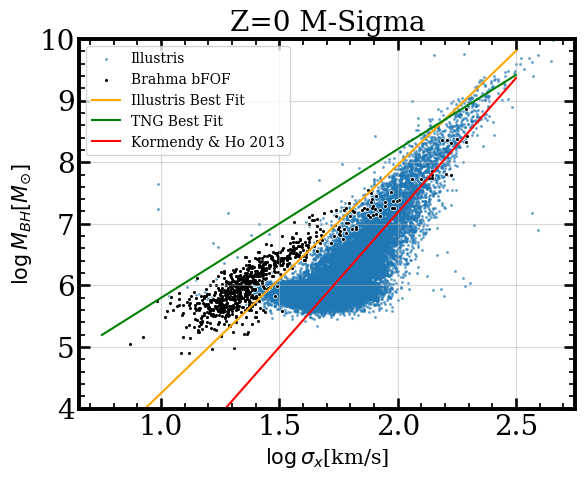

In [12]:
plt.scatter(np.log10(sigmaxIll),np.log10(M_Illz0),s=1.5,label="Illustris",alpha=0.5)
plt.scatter(np.log10(sigmax1),np.log10(M_bFOF),s=5,color='white',alpha=1)
plt.scatter(np.log10(sigmax1),np.log10(M_bFOF),s=1.5,label="Brahma bFOF",color='black',alpha=1)
plt.plot(x,y[0],label='Illustris Best Fit',color='orange')
plt.plot(x,TNGy[0],label='TNG Best Fit',color='green')
plt.plot(xfit,KH13_yfit[0],label='Kormendy & Ho 2013',color='red')

plt.xlabel(r'$\log \sigma_{x} $[km/s]',size=15)
plt.ylabel(r'$\log M_{BH} [M_{\odot}]$',size=15)

plt.ylim(4,10)
plt.grid(alpha=0.5)
plt.legend(fontsize=10)
    
plt.title('Z=0 M-Sigma',size=20)

plt.savefig('Z0_Illustris')#_bFOF_comparison.png')

# Stellar mass - Sigma plots

In [6]:
bFOFz0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z0')
LW10z0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z0')
spinz0 = ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z0')
richz0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z0')

MstarsbFOF = [np.sum(bFOFz0[1][i]) for i in range(len(bFOFz0[1]))]
MstarsLW10 = [np.sum(LW10z0[1][i]) for i in range(len(LW10z0[1]))]
Mstarsspin = [np.sum(spinz0[1][i]) for i in range(len(spinz0[1]))]
Mstarsrich = [np.sum(richz0[1][i]) for i in range(len(richz0[1]))]

MBHbFOF = bFOFz0[0]
MBHLW10 = LW10z0[0]
MBHspin = spinz0[0]
MBHrich = richz0[0]

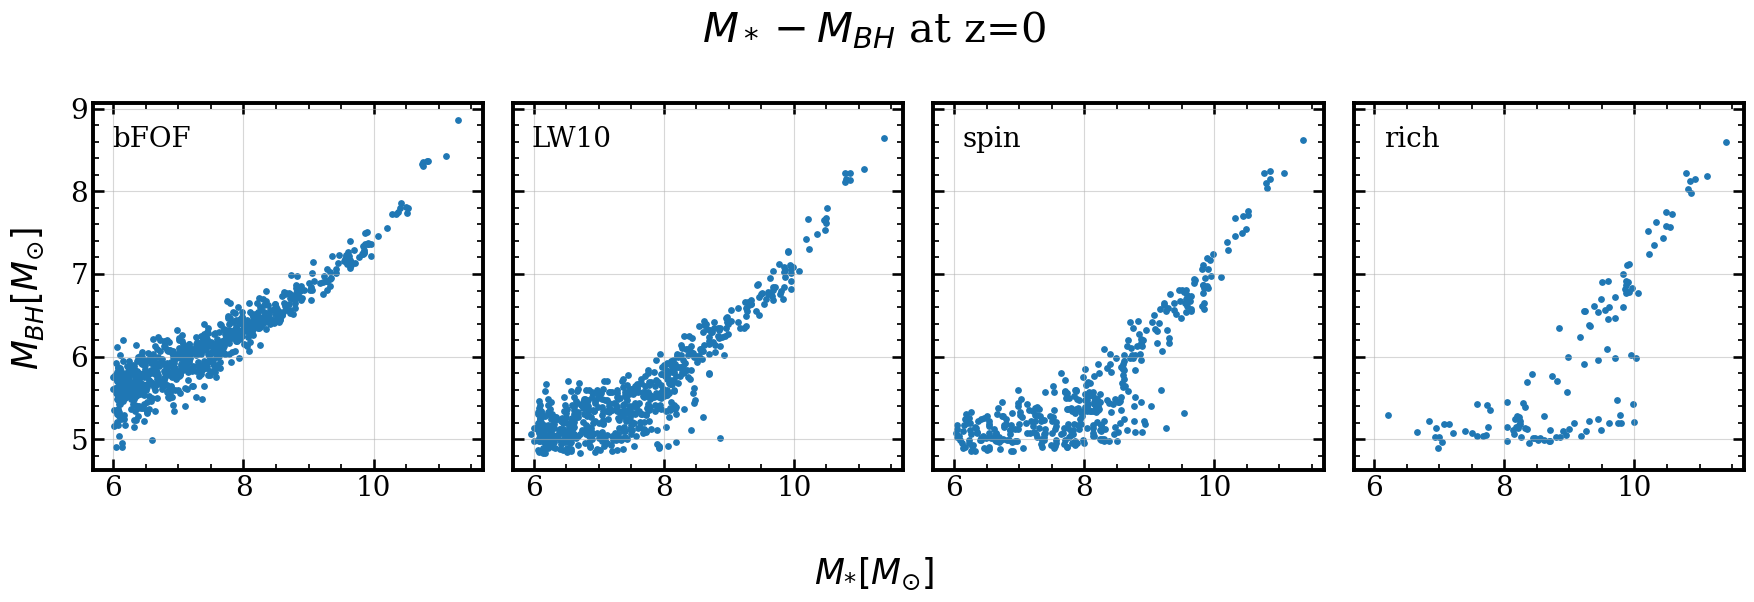

In [19]:
f,axs = plt.subplots(1,4,sharey = True,sharex = True,figsize = (18,6))

axs[0].scatter(np.log10(MstarsbFOF),np.log10(MBHbFOF),s=15)#,color='black')
axs[1].scatter(np.log10(MstarsLW10),np.log10(MBHLW10),s=15)#,color='black')
axs[2].scatter(np.log10(Mstarsspin),np.log10(MBHspin),s=15)#,color='black')
axs[3].scatter(np.log10(Mstarsrich),np.log10(MBHrich),s=15)#,color='black')

axs[0].text(0.15, 0.9, 'bFOF', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes,size=20)
axs[1].text(0.15, 0.9, 'LW10', horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes,size=20)
axs[2].text(0.15, 0.9, 'spin', horizontalalignment='center', verticalalignment='center', transform=axs[2].transAxes,size=20)
axs[3].text(0.15, 0.9, 'rich', horizontalalignment='center', verticalalignment='center', transform=axs[3].transAxes,size=20)

f.supxlabel('$M_{*} [M_{\odot}]$',size=25)
f.supylabel('$M_{BH} [M_{\odot}]$',size=25)

for ax in axs:
    ax.grid(alpha=0.5)
    
f.suptitle('$M_*-M_{BH}$ at z=0',size=30)
f.tight_layout()

plt.savefig('Plots/Z0_Mstar_M_BH.png')

# Highlighting outliers in M-Sigma 

and plotting in Mstar-M_BH and Mstar-Sigma plots

In [33]:
bFOF=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z0')
LW10=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z0')
spin = ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z0')
rich=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z0')

MstarsbFOF = np.log10([np.sum(bFOF[1][i]) for i in range(len(bFOF[1]))])
MstarsLW10 = np.log10([np.sum(LW10[1][i]) for i in range(len(LW10[1]))])
Mstarsspin = np.log10([np.sum(spin[1][i]) for i in range(len(spin[1]))])
Mstarsrich = np.log10([np.sum(rich[1][i]) for i in range(len(rich[1]))])

# Grabbing x-sigma values
Sigma_bFOF = np.log10(bFOF[5])[:,0]
Sigma_LW10 = np.log10(LW10[5])[:,0]
Sigma_spin = np.log10(spin[5])[:,0]
Sigma_rich = np.log10(rich[5])[:,0]

M_bFOF = np.log10(np.array(bFOF[0])[nonzero1])
M_LW10 = np.log10(np.array(LW10[0])[nonzero2])
M_spin = np.log10(np.array(spin[0])[nonzero3])
M_rich = np.log10(np.array(rich[0])[nonzero4])

Sigma_bFOF = np.log10(sigmax1)
Sigma_LW10 = np.log10(sigmax2)
Sigma_spin = np.log10(sigmax3)
Sigma_rich = np.log10(sigmax4)

In [5]:
# Making a best fine line for bFOF M-Sigma
model=LinearRegression()

modelx=Sigma_bFOF.reshape(-1, 1)
modely=M_bFOF.reshape(-1, 1)

model.fit(modelx,modely)

xfit=np.linspace(0.75,2.5,100)
bFOF_yfit=model.coef_*xfit + model.intercept_

ypred = model.predict(modelx)
resid=modely-ypred
std_dev=np.std(resid)

In [6]:
# Identifying points from each box that are outside 3 std devs of bFOF best fit line

m1 = model.coef_
m2 = model.coef_
c1 = model.intercept_ + 3*std_dev
c2 = model.intercept_ - 3*std_dev

above1,below1 = points_outside_bounds(Sigma_bFOF, M_bFOF, m1, m2, c1, c2)
above2,below2 = points_outside_bounds(Sigma_LW10, M_LW10, m1, m2, c1, c2)
above3,below3 = points_outside_bounds(Sigma_spin, M_spin, m1, m2, c1, c2)
above4,below4 = points_outside_bounds(Sigma_rich, M_rich, m1, m2, c1, c2)

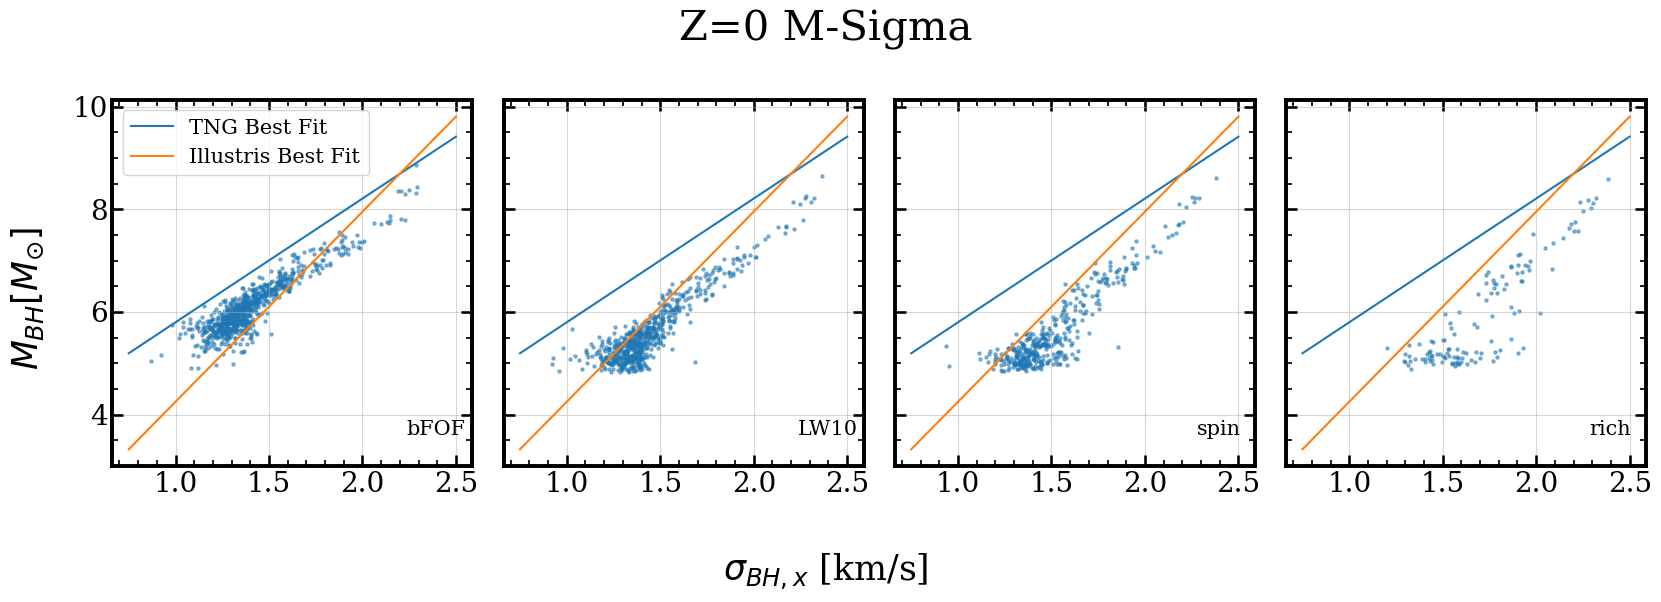

In [35]:
# Plotting
f,axs = plt.subplots(1,4,sharey = True,sharex=True,figsize = (17,6))

axs[0].scatter(Sigma_bFOF,M_bFOF,s=5,alpha=0.5)
axs[1].scatter(Sigma_LW10,M_LW10,s=5,alpha=0.5)
axs[2].scatter(Sigma_spin,M_spin,s=5,alpha=0.5)
axs[3].scatter(Sigma_rich,M_rich,s=5,alpha=0.5)

# axs[0].scatter(Sigma_bFOF[above1],M_bFOF[above1],s=5,alpha=0.5,color='red')
# axs[0].scatter(Sigma_bFOF[below1],M_bFOF[below1],s=5,alpha=0.5,color='black')
# axs[1].scatter(Sigma_LW10[above2],M_LW10[above2],s=5,alpha=0.5,color='red')
# axs[1].scatter(Sigma_LW10[below2],M_LW10[below2],s=5,alpha=0.5,color='black')
# axs[2].scatter(Sigma_spin[above3],M_spin[above3],s=5,alpha=0.5,color='red')
# axs[2].scatter(Sigma_spin[below3],M_spin[below3],s=5,alpha=0.5,color='black')
# axs[3].scatter(Sigma_rich[above4],M_rich[above4],s=5,alpha=0.5,color='red',label='Overmassive')
# axs[3].scatter(Sigma_rich[below4],M_rich[below4],s=5,alpha=0.5,color='black',label='Undermassive')

# Plotting best fit line
# axs[0].plot(xfit,bFOF_yfit[0]+3*std_dev)
# axs[0].plot(xfit,bFOF_yfit[0]-3*std_dev)

# axs[1].plot(xfit,bFOF_yfit[0]+3*std_dev)
# axs[1].plot(xfit,bFOF_yfit[0]-3*std_dev)

# axs[2].plot(xfit,bFOF_yfit[0]+3*std_dev)
# axs[2].plot(xfit,bFOF_yfit[0]-3*std_dev)

# axs[3].plot(xfit,bFOF_yfit[0]+3*std_dev)
# axs[3].plot(xfit,bFOF_yfit[0]-3*std_dev)

axs[0].text(0.9, 0.1, 'bFOF', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes,size=15)
axs[1].text(0.9, 0.1, 'LW10', horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes,size=15)
axs[2].text(0.9, 0.1, 'spin', horizontalalignment='center', verticalalignment='center', transform=axs[2].transAxes,size=15)
axs[3].text(0.9, 0.1, 'rich', horizontalalignment='center', verticalalignment='center', transform=axs[3].transAxes,size=15)

# plt.plot(x,TNGy[0],label='TNG Best Fit')
# plt.plot(x,y[0],label='Illustris Best Fit')
f.supxlabel('$\sigma_{BH,x}$ [km/s]',size=25)
f.supylabel('$M_{BH} [M_{\odot}]$',size=25)

for ax in axs:
    ax.grid(alpha=0.5)
    if ax==axs[0]:
        ax.plot(x,TNGy[0],label='TNG Best Fit')
        ax.plot(x,y[0],label='Illustris Best Fit')
        ax.legend(fontsize=15)
    elif ax==axs[-1]:
        ax.plot(x,TNGy[0])
        ax.plot(x,y[0])
        # ax.legend(fontsize=15)
    else:
        ax.plot(x,TNGy[0])
        ax.plot(x,y[0])
    
    
f.suptitle('Z=0 M-Sigma',size=30)
f.tight_layout()

plt.savefig('Plots/Z0_M_Sigma.png')

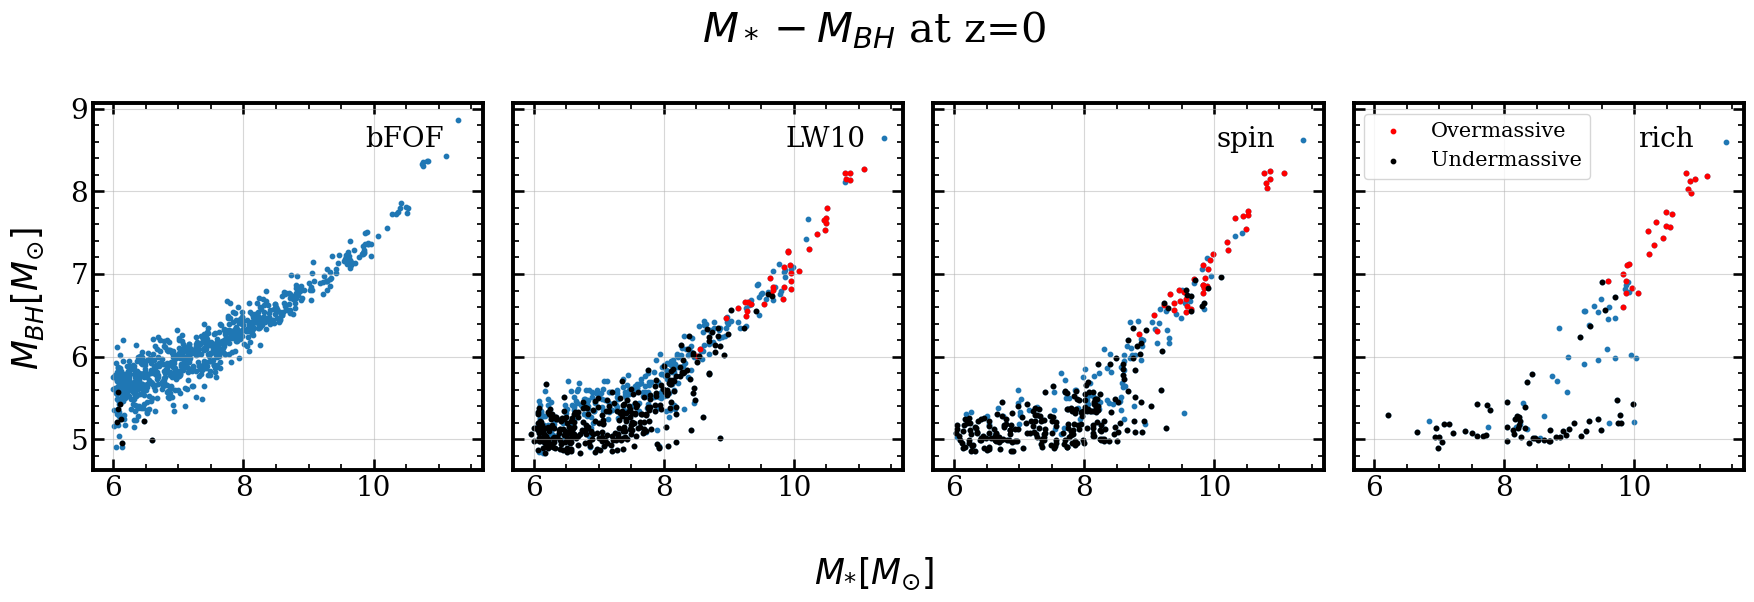

In [23]:
f,axs = plt.subplots(1,4,sharey = True,sharex = True,figsize = (18,6))

axs[0].scatter(MstarsbFOF,M_bFOF,s=10)
axs[1].scatter(MstarsLW10,M_LW10,s=10)
axs[2].scatter(Mstarsspin,M_spin,s=10)
axs[3].scatter(Mstarsrich,M_rich,s=10)

axs[0].scatter(MstarsbFOF[above1],M_bFOF[above1],s=10,color='red')
axs[1].scatter(MstarsLW10[above2],M_LW10[above2],s=10,color='red')
axs[2].scatter(Mstarsspin[above3],M_spin[above3],s=10,color='red')
axs[3].scatter(Mstarsrich[above4],M_rich[above4],s=10,color='red',label='Overmassive')

axs[0].scatter(MstarsbFOF[below1],M_bFOF[below1],s=10,color='black')
axs[1].scatter(MstarsLW10[below2],M_LW10[below2],s=10,color='black')
axs[2].scatter(Mstarsspin[below3],M_spin[below3],s=10,color='black')
axs[3].scatter(Mstarsrich[below4],M_rich[below4],s=10,color='black',label='Undermassive')

axs[0].text(0.8, 0.9, 'bFOF', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes,size=20)
axs[1].text(0.8, 0.9, 'LW10', horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes,size=20)
axs[2].text(0.8, 0.9, 'spin', horizontalalignment='center', verticalalignment='center', transform=axs[2].transAxes,size=20)
axs[3].text(0.8, 0.9, 'rich', horizontalalignment='center', verticalalignment='center', transform=axs[3].transAxes,size=20)

axs[3].legend(fontsize=15)

f.supxlabel('$M_{*} [M_{\odot}]$',size=25)
f.supylabel('$M_{BH} [M_{\odot}]$',size=25)

for ax in axs:
    ax.grid(alpha=0.5)
    
f.suptitle('$M_*-M_{BH}$ at z=0',size=30)
f.tight_layout()

plt.savefig('Plots/Z0_Mstar_M_BH_outliers.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


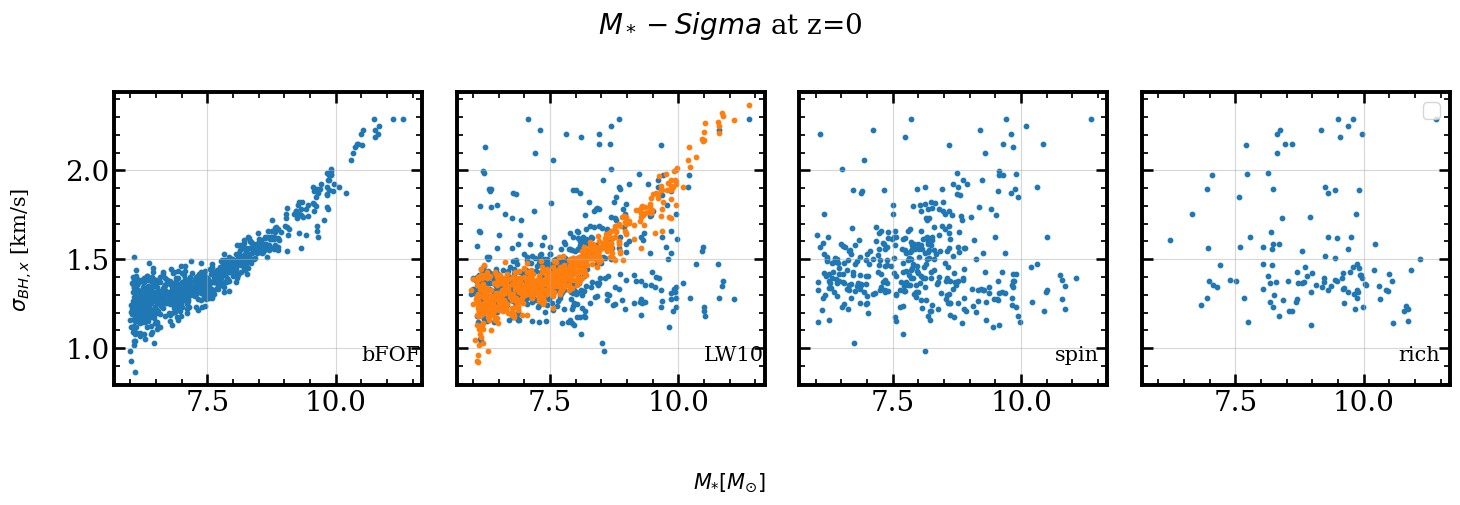

In [23]:
# Plotting
f,axs = plt.subplots(1,4,sharex = True,sharey = True,figsize = (15,5))

axs[0].scatter(MstarsbFOF,Sigma_bFOF,s=10)
axs[1].scatter(MstarsLW10,Sigma_LW10,s=10)
axs[1].scatter(MstarsLW10,np.log10(LW10[5])[:,0],s=10)
axs[2].scatter(Mstarsspin,Sigma_spin,s=10)
axs[3].scatter(Mstarsrich,Sigma_rich,s=10)

# axs[0].scatter(MstarsbFOF[above1],Sigma_bFOF[above1],s=10,color='red')
# axs[1].scatter(MstarsLW10[above2],Sigma_LW10[above2],s=10,color='red')
# axs[2].scatter(Mstarsspin[above3],Sigma_spin[above3],s=10,color='red')
# axs[3].scatter(Mstarsrich[above4],Sigma_rich[above4],s=10,color='red',label='Overmassive')

# axs[0].scatter(MstarsbFOF[below1],Sigma_bFOF[below1],s=10,color='black')
# axs[1].scatter(MstarsLW10[below2],Sigma_LW10[below2],s=10,color='black')
# axs[2].scatter(Mstarsspin[below3],Sigma_spin[below3],s=10,color='black')
# axs[3].scatter(Mstarsrich[below4],Sigma_rich[below4],s=10,color='black',label='Undermassive')

axs[3].legend(fontsize=15)

axs[0].text(0.9, 0.1, 'bFOF', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes,size=15)
axs[1].text(0.9, 0.1, 'LW10', horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes,size=15)
axs[2].text(0.9, 0.1, 'spin', horizontalalignment='center', verticalalignment='center', transform=axs[2].transAxes,size=15)
axs[3].text(0.9, 0.1, 'rich', horizontalalignment='center', verticalalignment='center', transform=axs[3].transAxes,size=15)

f.supxlabel('$M_{*} [M_{\odot}]$',size=15)
f.supylabel('$\sigma_{BH,x}$ [km/s]',size=15)

for ax in axs:
    ax.grid(alpha=0.5)
    
f.suptitle('$M_*-Sigma$ at z=0',size=20)
f.tight_layout()

plt.savefig('Plots/Z0_Mstar_Sigma_outliers.png')